當前工作目錄 ==> /home/jovyan/SSNP3D/0_dir
[1.76240e+05 2.49992e+06 1.75000e+00]
176240.0
2499920.0
1.75


[1.76260e+05 2.49992e+06 1.87000e+00]
176260.0
2499920.0
1.87


[1.76280e+05 2.49992e+06 1.97000e+00]
176280.0
2499920.0
1.97


[1.76300e+05 2.49992e+06 1.68000e+00]
176300.0
2499920.0
1.68


[1.76320e+05 2.49992e+06 1.52000e+00]
176320.0
2499920.0
1.52


1.75
1.87
1.97
1.68
1.52


19296
19296
19296
zValue < 0 筆數有 407
---------------------
(176240, 2499920, 2.62)
(176260, 2499920, 2.8)
(176280, 2499920, 2.96)
(176300, 2499920, 2.52)
(176320, 2499920, 2.28)
[(176240, 2499920, 2.62), (176260, 2499920, 2.8), (176280, 2499920, 2.96), (176300, 2499920, 2.52), (176320, 2499920, 2.28)]


(176240, 2499920, 2.62)
(176260, 2499920, 2.8)
(176280, 2499920, 2.96)
(176300, 2499920, 2.52)
(176320, 2499920, 2.28)
[(176240, 2499920, 2.62), (176260, 2499920, 2.8), (176280, 2499920, 2.96), (176300, 2499920, 2.52), (176320, 2499920, 2.28)]


Done


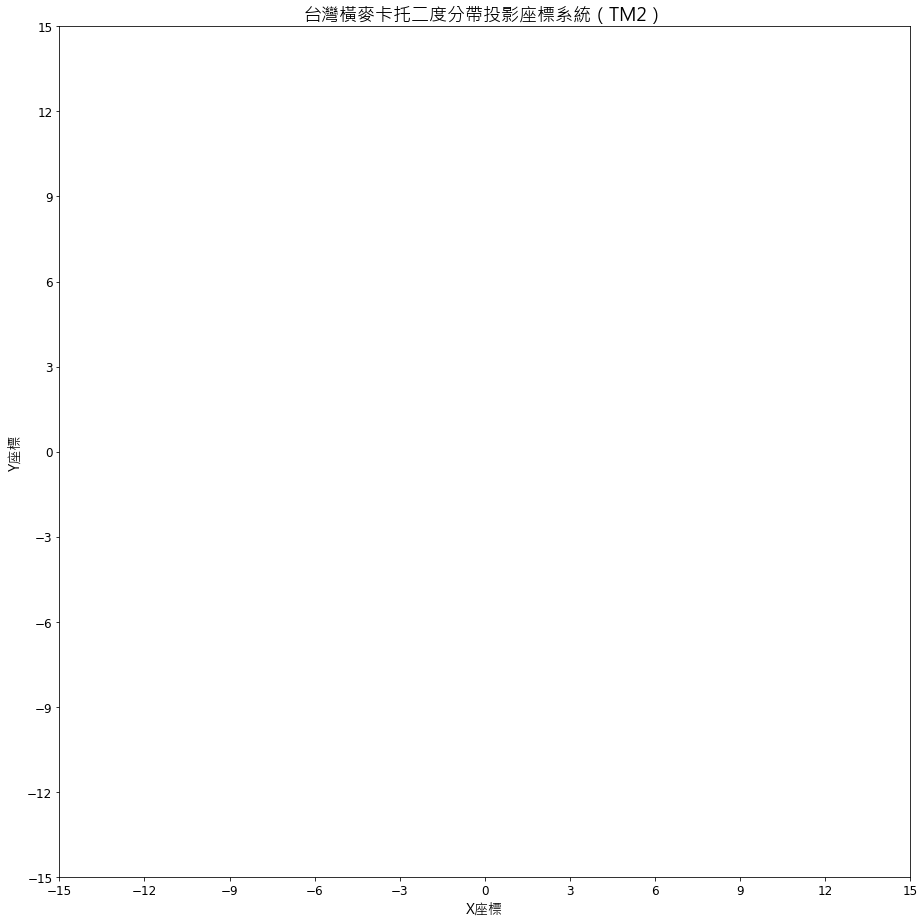

In [3]:
# SSNP-01.py
# 2021-11-14
#
# 將" "分界改為","; 調整z高程數據; 產生dem-xx.csv file
#
# run on mybinder.org
# 程式檔 path is './0_dir'
# 資料檔 path is './1_dir'
# 圖形檔 path is './2_dir'
#
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import csv
import numpy as np
import pprint
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 2.0   # cm
    right_margin = 2.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 2.0    # cm
    bottom_margin = 2.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(fname='/home/jovyan/fonts/msjh.ttc')
# ------------------------------------------------------------
#
tup7 = set_graphic_area(30,30)
#
fig = plt.figure(figsize=(tup7[0], tup7[1]))
ax  = fig.add_subplot(1,1,1)
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlabel('X座標', fontproperties=myfont, fontsize=14)
plt.ylabel('Y座標', fontproperties=myfont, fontsize=14)
#
plt.xlim(-15, 15)    # set xlim to xMinMax[0], xMinMax[1]
plt.ylim(-15, 15)    # set ylim to yMinMax[0], yMinMax[1]
#
x_ticks = np.linspace(-15,15,11)
y_ticks = np.linspace(-15,15,11)
#
plt.xticks(x_ticks, fontsize=12)
plt.yticks(y_ticks, fontsize=12)
#
#
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box') # set X,Y same ratio & scale
#
path_data    = './data/'
path_graphic = './graphic/'
#
# 逐筆讀入資料 1-94182051dem.grd (13247 row)
# Read from the file into the array data(:,:)
# array data shape is (13247, 3)
data1 = np.loadtxt(path_data + '2-94182052dem.grd',delimiter=' ',dtype='float')
#
# for numpy -->  data[..., 1] 等價于 data[:, 1]
#
i = 0
for row in data1 :
    i = i + 1
    # 顯示前五筆資料
    if i < 6 :
        print (row)
        for field in row :
            print (field)
        # end for
        print ('\n')
    # end if
# end for
#
function_float_convertTo_int = np.vectorize(np.int32)
# Columns.
# data[..., 0] is array of float number
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
TM2_X = function_float_convertTo_int(data1[..., 0]) # 二度分帶 X座標
TM2_Y = function_float_convertTo_int(data1[..., 1]) # 二度分帶 Y座標
TM2_Z = data1[..., 2] # DEM file z value
# 串列生成式
tm2_Zlist = [round(z*1.5,2) for z in TM2_Z]
#
i = 0
j = 0
for zValue in TM2_Z :
    i = i + 1
    # 顯示前五筆資料
    if i < 6 :
        print (zValue)
    # end if
    if zValue < 0 :
        j = j + 1
    # end if
# end for
#
print ('\n')
print (TM2_X.size) # 13247
print (TM2_Y.size) # 13247
print (TM2_Z.size) # 13247
print ('zValue < 0 筆數有',j)
print('---------------------')
#
i = 0
dem_list = list(zip(TM2_X,TM2_Y,tm2_Zlist))
for item in dem_list :
    i = i + 1
    # 顯示前五筆資料
    if i < 6 :
        print (item)
    # end if
# end for
print (dem_list[0:5]) # begin at 0, total 5 items
print ('\n')
with open(path_data + 'dem-02.csv','wt') as outfile :
    dem_1 = csv.writer(outfile)
    dem_1.writerows(dem_list)
# end with    
#
# 逐筆讀入資料 dem-01.csv (13247 row)
# Read the file into the array data(:,:)
# array shape is (13247, 3)
data2 = np.loadtxt(path_data + 'dem-02.csv',delimiter=',',dtype='float')
TM2_X = function_float_convertTo_int(data2[..., 0]) # 二度分帶 X座標
TM2_Y = function_float_convertTo_int(data2[..., 1]) # 二度分帶 Y座標
TM2_Z = data2[..., 2] # DEM file z value
#
i = 0
dem_list = list(zip(TM2_X,TM2_Y,TM2_Z))
for item in dem_list :
    i = i + 1
    # 顯示前五筆資料
    if i < 6 :
        print (item)
    # end if
# end for
print (dem_list[0:5]) # begin at 0, total 5 items
print ('\n')
#
plt.draw()
# 設定子圖的標題
ax.set_title('台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=18)
#
# bbox_inches='tight' is for display ylabel
# plt.savefig(path_graphic + "Hipparcos-02.png",format="png",dpi=72, bbox_inches='tight')
plt.savefig(path_graphic + "SSNP-01.pdf", dpi=300, bbox_inches='tight')
#
print ('Done')